# Setup & Input

In [ ]:
import numpy as np

num = int(input("Enter number of points in point cloud: "))

# Read point cloud
points = []
for i in range(num):
    point = input(f"Enter point {i+1} (in format: x y z): ")
    points.append([float(coord) for coord in point.split()])

points = np.array(points)
print(points)

# Read translation vector and rotation angles
translation = []
coords = input(f"Enter translation coordinates (in format tx ty tz) : ")
translation.append([float(coord) for coord in coords.split()])
print(translation)

rotation = []
angles = input(f"Enter rotation angles (in format rx ry rz in degrees): ")
rotation.append([float(angle) for angle in angles.split()])
print(rotation)

[[1. 4. 5.]
 [2. 4. 3.]]
[[2.0, 3.0, 6.0]]
[[12. 34. 67.]]


# Calculations (using HTM)

In [18]:
# Rotation matrices

rx, ry, rz = np.radians([rotation[0][0], rotation[0][1], rotation[0][2]])

Rx = np.array([[1, 0, 0],
               [0, np.cos(rx), -np.sin(rx)],
               [0, np.sin(rx), np.cos(rx)]])

Ry = np.array([[np.cos(ry), 0, np.sin(ry)],
               [0, 1, 0],
               [-np.sin(ry), 0, np.cos(ry)]])

Rz = np.array([[np.cos(rz), -np.sin(rz), 0],
               [np.sin(rz), np.cos(rz), 0],
               [0, 0, 1]])

R = Rz @ Ry @ Rx

# Homogeneous Transformation Matrix
T = np.eye(4)
T[:3, :3] = R
T[:3, 3] = translation[0]
print("Homogeneous Transformation Matrix:")
print(T)

# Apply transformation to points using homogeneous coordinates and matrix multiplication
n = points.shape[0]
points_homogeneous = np.hstack((points, np.ones((n, 1))))
transformed_points_homogeneous = (T @ points_homogeneous.T).T
transformed_points = transformed_points_homogeneous[:, :3]

print("original points:")
print(points)
print("transformed points:")
print(transformed_points)


Homogeneous Transformation Matrix:
[[ 0.32393079 -0.85496214  0.40510317  2.        ]
 [ 0.76313311  0.48921313  0.42225391  3.        ]
 [-0.5591929   0.1723666   0.81092111  6.        ]
 [ 0.          0.          0.          1.        ]]
original points:
[[1. 4. 5.]
 [2. 4. 3.]]
transformed points:
[[ 0.9295981   7.83125521 10.18487907]
 [ 0.44332253  7.74988049  8.00384394]]


# Visualization

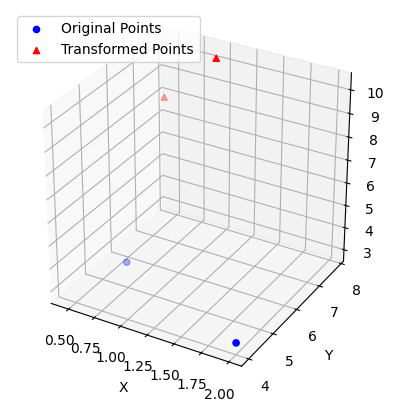

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create 3D figure
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')

# Plot original points
ax.scatter(points[:, 0], points[:, 1], points[:, 2],
            c='b', marker='o', label='Original Points')

# Plot transformed points
ax.scatter(transformed_points[:, 0], transformed_points[:, 1],
            transformed_points[:, 2], c='r', marker='^', label='Transformed Points')

# Set labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Set equal aspect ratio for all axes
ax.set_box_aspect([1,1,1])
plt.show()